### importing libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from statistics import mode

plt.rcParams['figure.figsize'] = 10,7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 720x540 with 0 Axes>

### Import Data

In [4]:
cust_seg = pd.read_csv(r'/Users/vishesh/Desktop/ML - Python/project/Git Repository/Segmentation of Credit Card Customers/CC_GENERAL.csv')

In [5]:
cust_seg.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
cust_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
cust_seg.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Creating Neccesary Columns

In [8]:
cust_seg['monthly_avg_purchases'] = cust_seg.PURCHASES/cust_seg.TENURE

In [9]:
cust_seg['monthly_cash_advance'] = cust_seg.CASH_ADVANCE/cust_seg.TENURE

In [10]:
cust_seg['limit_usage'] = cust_seg.BALANCE/cust_seg.CREDIT_LIMIT

In [11]:
cust_seg['purchase_type'] = np.where((cust_seg.ONEOFF_PURCHASES == 0) & (cust_seg.INSTALLMENTS_PURCHASES == 0), 'None',
                            np.where((cust_seg.ONEOFF_PURCHASES > 0) & (cust_seg.INSTALLMENTS_PURCHASES == 0), 'One_of',
                                np.where((cust_seg.ONEOFF_PURCHASES == 0) & (cust_seg.INSTALLMENTS_PURCHASES > 0), 'Installment_Purchases', 
                                'Both'        ) ) )

In [12]:
cust_seg_num = cust_seg._get_numeric_data()

In [13]:
cust_seg_cat = cust_seg[['CUST_ID','purchase_type']]

### Outlier Treatment

In [16]:
def outlier_capping(x, upper=0.99, lower=0.01):
    upper_limit = x.quantile(upper)
    lower_limit = x.quantile(lower)
    x = x.clip(upper=upper_limit, lower=lower_limit)
    return x

In [17]:
cust_seg_num = cust_seg_num.apply(lambda x : outlier_capping(x,upper = 0.95,lower = 0.05))

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
cust_seg_cat.purchase_type = le.fit(cust_seg_cat.purchase_type).transform(cust_seg_cat.purchase_type)

/var/folders/z9/ycphb_jj265fpb6dj9g0syvw0000gn/T/ipykernel_12409/3922899679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_seg_cat.purchase_type = le.fit(cust_seg_cat.purchase_type).transform(cust_seg_cat.purchase_type)


In [20]:
cust_seg_cat.CUST_ID = le.fit(cust_seg_cat.CUST_ID).transform(cust_seg_cat.CUST_ID)

/var/folders/z9/ycphb_jj265fpb6dj9g0syvw0000gn/T/ipykernel_12409/1491739236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_seg_cat.CUST_ID = le.fit(cust_seg_cat.CUST_ID).transform(cust_seg_cat.CUST_ID)


In [21]:
cust_seg_cat.head()

,CUST_ID,purchase_type
0,0,1
1,1,2
2,2,3
3,3,3
4,4,3


In [22]:
cust_seg_num = cust_seg_num.apply(lambda x : x.fillna(np.mean(x)))

In [23]:
cust_seg = pd.concat([cust_seg_cat, cust_seg_num], axis = 1)
columns = cust_seg.columns

### Scaling Data

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
cust_seg = sc_X.fit_transform(cust_seg)

In [25]:
cust_seg = pd.DataFrame(cust_seg, columns = columns)

### PCA

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(cust_seg)

array([[-1.17651821, -2.22074748,  0.2404949 , ..., -0.02871981,
         0.02996728,  0.02393535],
       [-2.77435693,  3.29307752,  1.3397132 , ...,  0.04452431,
         0.03875252,  0.04319178],
       [ 0.84340527,  0.06015206,  1.51585438, ..., -0.13255093,
         0.03897997, -0.00904528],
       ...,
       [-0.37127551, -2.90623891, -0.89052028, ..., -0.0903111 ,
        -0.14702465, -0.10871852],
       [-2.29779118, -2.48578171,  0.53719777, ..., -0.02301229,
        -0.1221832 , -0.17676953],
       [ 0.02278622, -0.95745565,  1.58935866, ...,  0.07141648,
        -0.28416323,  0.43770389]])

In [27]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.99966410e-01, 2.26159522e-01, 8.47803341e-02, 7.74902876e-02,
       5.79020512e-02, 4.06098481e-02, 3.74792497e-02, 3.18054579e-02,
       2.93109191e-02, 2.29367876e-02, 1.98203864e-02, 1.82649214e-02,
       1.44207718e-02, 1.10151874e-02, 9.12032918e-03, 6.96413189e-03,
       4.80863270e-03, 3.49145915e-03, 1.98434699e-03, 1.19272201e-03,
       3.19760913e-04, 1.56482329e-04])

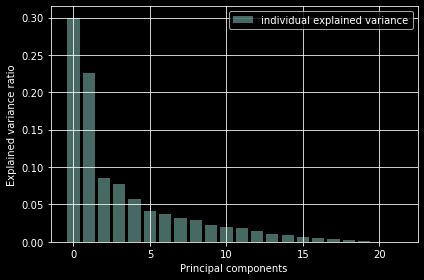

In [28]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [29]:
pca=PCA(n_components=13)
cust_seg_new=pca.fit_transform(cust_seg)
cust_seg_new

array([[-1.17651821, -2.22074748,  0.2404949 , ...,  0.15751633,
         0.36955714, -0.35131905],
       [-2.77435693,  3.29307752,  1.3397132 , ...,  1.73805945,
         0.05957252, -1.06295966],
       [ 0.84340527,  0.06015206,  1.51585438, ...,  0.60091483,
        -1.27639908,  0.4063183 ],
       ...,
       [-0.37127551, -2.90623891, -0.89052028, ...,  0.42388782,
         0.18833897,  0.61115335],
       [-2.29779118, -2.48578171,  0.53719777, ..., -0.60018535,
         0.48017407,  0.62064754],
       [ 0.02278622, -0.95745565,  1.58935866, ..., -0.50101374,
        -0.91527027,  0.74778281]])

In [30]:
cust_seg_new = pd.DataFrame(cust_seg_new)

### Choosing Number of Clusters

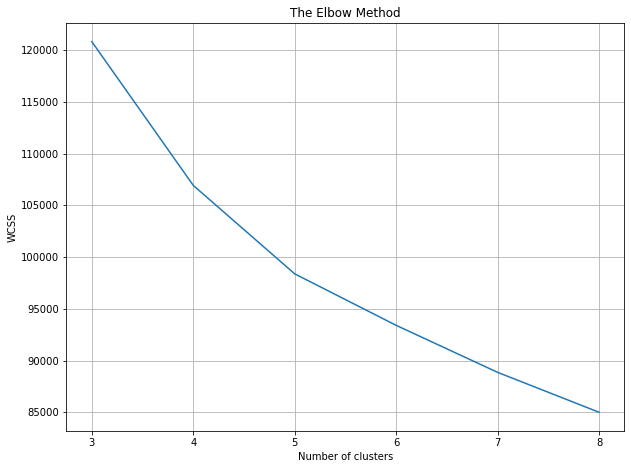

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(3, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cust_seg_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(3, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Creating Model

In [32]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
ykmeans = kmeans.fit_predict(cust_seg_new)
cust_seg_new['ykmeans'] = ykmeans 

In [33]:
cust_seg_new.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,ykmeans
0,-1.176518,-2.220747,0.240495,-0.819553,-1.105157,-0.198613,0.777731,-1.054810,1.200047,0.171175,0.157516,0.369557,-0.351319,0
1,-2.774357,3.293078,1.339713,0.803477,-2.026002,-0.197328,0.381215,0.536388,0.780651,0.371226,1.738059,0.059573,-1.062960,2
2,0.843405,0.060152,1.515854,-2.636488,-0.157462,-0.496484,1.987735,-0.230743,-1.107293,-0.653003,0.600915,-1.276399,0.406318,0
3,-0.457809,-0.305212,2.343019,-1.905365,-0.792478,0.929891,0.352334,-0.657190,0.465865,0.058143,-1.165373,-0.498770,-0.621959,0
4,-1.917840,-1.342575,0.163468,-2.242232,-0.326019,-0.543899,0.777414,0.108953,1.457042,0.369956,0.383823,-0.546086,-0.187944,0
5,0.968409,0.647825,-2.493714,-1.896543,-1.034743,1.203976,-0.146058,0.696413,2.008708,-0.375285,-0.109669,-0.591868,-0.221561,3
6,7.553257,1.519550,3.080900,0.232875,-0.640265,-0.986538,0.784834,1.070743,0.497881,-0.242635,0.253440,0.791175,0.622988,1
7,0.594388,-0.699694,-2.282194,-1.067620,-1.006124,-0.052561,1.190150,-0.324714,1.021993,-0.189165,0.680733,-0.512591,0.067703,3
8,0.434617,-0.823839,0.257632,-1.101686,-1.452452,-0.017432,1.226621,-0.848964,0.260496,0.849400,-0.286671,1.174813,-0.282168,3
9,-0.025273,-1.042213,3.219270,-1.419685,-1.507698,0.885930,0.472968,-0.920479,0.046722,0.583145,-0.743567,-0.543579,0.045298,0


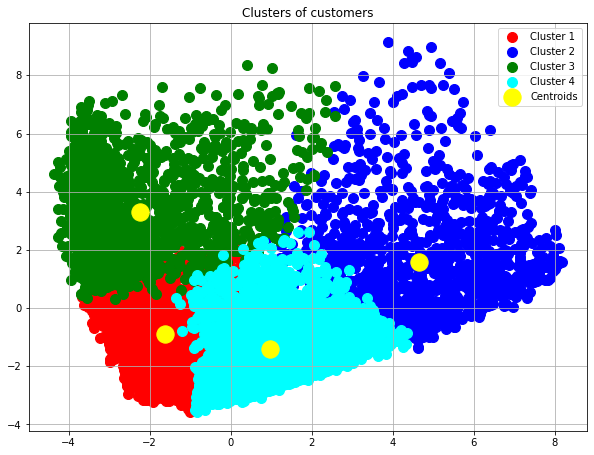

In [34]:
plt.scatter(cust_seg_new.loc[cust_seg_new.ykmeans == 0, 0], cust_seg_new.loc[cust_seg_new.ykmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cust_seg_new.loc[cust_seg_new.ykmeans == 1, 0], cust_seg_new.loc[cust_seg_new.ykmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(cust_seg_new.loc[cust_seg_new.ykmeans == 2, 0], cust_seg_new.loc[cust_seg_new.ykmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(cust_seg_new.loc[cust_seg_new.ykmeans == 3, 0], cust_seg_new.loc[cust_seg_new.ykmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(cust_seg_new.loc[cust_seg_new.ykmeans == 4, 0], cust_seg_new.loc[cust_seg_new.ykmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [36]:
cust_seg1 = pd.read_csv(r'/Users/vishesh/Desktop/ML - Python/project/Git Repository/Segmentation of Credit Card Customers/CC_GENERAL.csv')

In [37]:
cust_seg1['Cluster'] = ykmeans

In [38]:
cust_seg1.groupby('Cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1022.190131,0.805123,247.545565,225.340867,22.275079,460.433865,0.162758,0.122445,0.038218,0.111778,1.960599,2.841173,3191.078521,900.620093,607.979942,0.056650,11.473122
1,2333.595355,0.974544,4346.628281,2849.812642,1497.327468,607.767920,0.916044,0.655756,0.697787,0.076119,1.978707,53.836751,7555.821623,4267.397582,1167.042550,0.269461,11.871451
2,3977.021912,0.951321,364.177516,222.970040,141.274453,4055.189937,0.255702,0.107585,0.164316,0.436575,12.285903,5.696970,6650.266499,3026.316423,1654.556021,0.035954,11.279974
3,574.145691,0.877430,727.983720,211.943779,516.630090,113.151535,0.797947,0.144048,0.692860,0.029184,0.518685,15.722491,3494.997151,885.120702,587.534092,0.274748,11.536678


### Analyzing Clusters

In [39]:
cust_seg1.loc[cust_seg1.Cluster == 0,['CREDIT_LIMIT','PURCHASES','BALANCE','PAYMENTS','PURCHASES_FREQUENCY'] ].describe().T
#0  limit jyada, purchases jyada,Balance jyada, payments jyada- usage jyada

,count,mean,std,min,25%,50%,75%,max
CREDIT_LIMIT,3273.0,3191.078521,2706.257185,150.0,1500.000000,2500.000000,4000.000000,23000.00000
PURCHASES,3274.0,247.545565,413.385857,0.0,0.000000,61.360000,306.930000,2953.03000
BALANCE,3274.0,1022.190131,1080.681675,0.0,120.638882,832.862532,1476.868629,9335.31417
PAYMENTS,3274.0,900.620093,1450.956454,0.0,265.431410,521.542093,1010.833798,29272.48607
PURCHASES_FREQUENCY,3274.0,0.162758,0.217265,0.0,0.000000,0.083333,0.250000,1.00000


In [40]:
cust_seg1.loc[cust_seg1.Cluster == 1,['CREDIT_LIMIT','PURCHASES','BALANCE','PAYMENTS','PURCHASES_FREQUENCY'] ].describe().T
#1  limit okok, purchases okok,Balance okok, payments okok - usage jyada

,count,mean,std,min,25%,50%,75%,max
CREDIT_LIMIT,1268.0,7555.821623,4346.464585,500.000000,4500.000000,7000.000000,10000.000000,30000.00000
PURCHASES,1268.0,4346.628281,4131.942501,883.940000,2330.830000,3197.330000,4768.697500,49039.57000
BALANCE,1268.0,2333.595355,2628.237058,6.793588,426.014067,1364.296881,3278.661766,19043.13856
PAYMENTS,1268.0,4267.397582,4747.622735,0.000000,1855.615066,2893.841169,4792.804555,50721.48336
PURCHASES_FREQUENCY,1268.0,0.916044,0.157374,0.166667,0.916667,1.000000,1.000000,1.00000


In [41]:
cust_seg1.loc[cust_seg1.Cluster == 2,['CREDIT_LIMIT','PURCHASES','BALANCE','PAYMENTS','PURCHASES_FREQUENCY'] ].describe().T
#2  limit jyada, purchase kam, balance kam, payments kam - usage kam hai

,count,mean,std,min,25%,50%,75%,max
CREDIT_LIMIT,1518.0,6650.266499,3630.708024,50.000000,4000.000000,6000.000000,9000.000000,19600.00000
PURCHASES,1518.0,364.177516,797.412075,0.000000,0.000000,36.485000,490.157500,22101.78000
BALANCE,1518.0,3977.021912,2645.335856,36.979201,1905.424763,3407.472089,5542.640985,16304.88925
PAYMENTS,1518.0,3026.316423,3842.077074,0.000000,978.164111,1733.051782,3535.897990,39461.96580
PURCHASES_FREQUENCY,1518.0,0.255702,0.340837,0.000000,0.000000,0.083333,0.500000,1.00000


In [42]:
cust_seg1.loc[cust_seg1.Cluster == 3,['CREDIT_LIMIT','PURCHASES','BALANCE','PAYMENTS','PURCHASES_FREQUENCY'] ].describe().T
#3  limit jyada, purchases kam hai, balance jyada,payment jyada- usage kam


,count,mean,std,min,25%,50%,75%,max
CREDIT_LIMIT,2890.0,3494.997151,2833.691505,300.000000,1500.000000,2500.000000,4500.000000,20000.000000
PURCHASES,2890.0,727.983720,531.483510,12.000000,313.277500,571.140000,1024.960000,3200.000000
BALANCE,2890.0,574.145691,872.909278,0.000000,41.660531,145.082775,869.550103,11416.647360
PAYMENTS,2890.0,885.120702,859.344925,0.000000,328.546276,643.233438,1189.039520,8972.867229
PURCHASES_FREQUENCY,2890.0,0.797947,0.221239,0.166667,0.583333,0.875000,1.000000,1.000000


# Strategy
### Customer Beloging in Cluster 0:
    These customers are having a large limit and large usage. No need to invest on them as of now. They are doing fine.
### Customer Belonging in Cluster 1:
    These customers are frequent User their limit should be increased.
### Customer belonging to Cluster 2:
    These customers have decent limit but they are not potential customers as they rarely use their card and are not at all 
    interested.
### Customer belonging to Cluster 3:
    These customers have good limit but they only use for large amounts so they are potential customers 
    and we can give them schemes so that they spend frequently and become a regular user.